In [2]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import pandas as pd
import glob
import re
import pickle
import pprint

# Define the Path

In [3]:
path = 'C:/Users/ltandon/Downloads/Deep Learning dxc'

### Handy Functions

In [4]:
def display_img (img, figsize=(10, 10)):
    plt.figure (figsize=figsize)
    plt.imshow (img [:,:,::-1])
    plt.show ()

In [5]:
def distance_of_two_point(coord1,coord2):
    return(np.sqrt ((coord1 [1]-coord2 [1])**2 + (coord1 [2]-coord2 [2])**2))

### Template Image

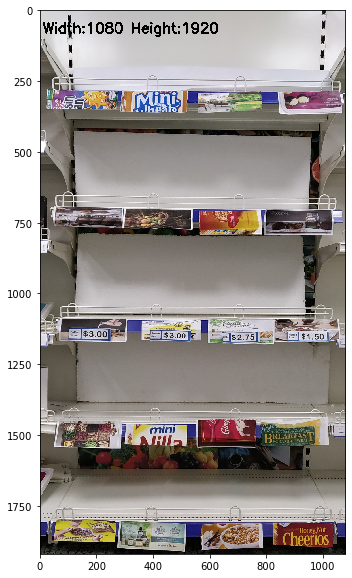

In [6]:
template = cv2.imread (f'{path}/empty_template.jpg')
template = cv2.resize(template,(1080,1920))
size = 'Width:' + str(template.shape[1])+ ' Height:' + str(template.shape[0])
cv2.putText (template,size,(10,80),cv2.FONT_HERSHEY_SIMPLEX,1.65, (0,0,0),5)
display_img(template)

### Test Image

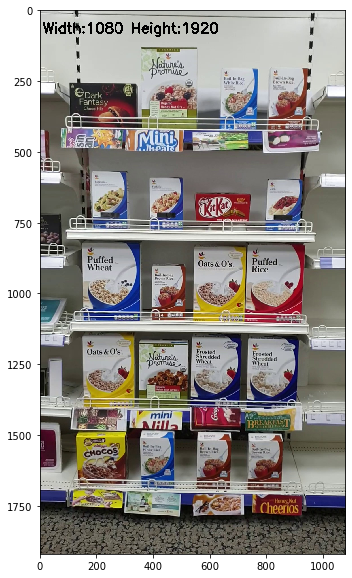

In [7]:
test = cv2.imread (f'{path}/zoomed1.jpg')
size = 'Width:' + str(test.shape[1])+ ' Height:' + str(test.shape[0])
cv2.putText (test,size,(10,80),cv2.FONT_HERSHEY_SIMPLEX,1.65, (0,0,0),5)
display_img(test)

### Reading Template Coordinates

In [8]:
template_coordinates = re.findall (
    r'<name>(.*?)[.png]*</name>.*?<xmin>(\d+?)</xmin>.*?<ymin>(\d+?)</ymin>.*?<xmax>(\d+?)</xmax>.*?<ymax>(\d+?)</ymax>', 
    open (f'{path}/zoomed_graph.xml').read (), 
    re.DOTALL
)

In [9]:
template_coordinates = list (map (
    lambda x: [x [0]] + list (map (int, x [1:])),
    template_coordinates
))

In [12]:
template_coordinates

[['dark_fantasy11', 104, 255, 345, 380],
 ['natures_promise_honey12', 353, 133, 560, 381],
 ['boil_in_bag_white_rice13', 638, 205, 770, 380],
 ['boil_in_bag_brown_rice14', 807, 200, 945, 381],
 ['rigatony21', 176, 571, 314, 737],
 ['farfalle22', 385, 590, 510, 739],
 ['kitkat23', 544, 640, 749, 742],
 ['ziti24', 796, 596, 925, 746],
 ['puffed_wheat31', 145, 817, 356, 1064],
 ['boil_in_bag_brown_rice32', 393, 901, 515, 1065],
 ['oats_and_os33', 541, 835, 723, 1071],
 ['puffed_rice34', 731, 827, 926, 1072],
 ['oats_and_os41', 150, 1148, 333, 1369],
 ['natures_promise_raisin42', 348, 1169, 525, 1376],
 ['frosted_shredded_wheat43', 533, 1148, 711, 1379],
 ['frosted_shredded_wheat44', 728, 1156, 907, 1381],
 ['chocos_500g51', 126, 1501, 308, 1654],
 ['boil_in_bag_white_rice52', 352, 1505, 483, 1662],
 ['boil_in_bag_brown_rice53', 549, 1510, 674, 1663],
 ['boil_in_bag_brown_rice54', 731, 1516, 857, 1664]]

### Template box

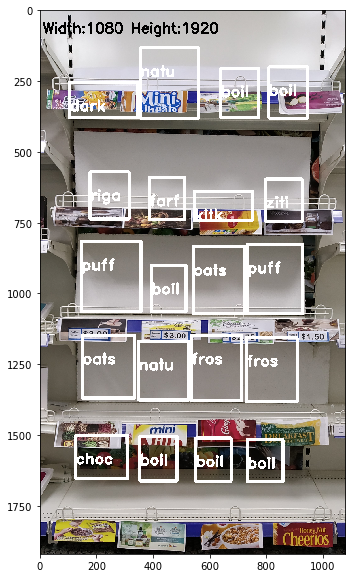

In [13]:
template_copy = template.copy ()

for coord in template_coordinates :
    cv2.rectangle (
        template_copy, 
        tuple (coord [1:3]), 
        tuple (coord [3:]), 
        (255, 255, 255), 
        thickness=10
    )
    cv2.putText (
        template_copy, 
        coord [0] [:4], 
        (coord [1], coord [2]+100), 
        cv2.FONT_HERSHEY_DUPLEX, 
        1.75, 
        (255, 255, 255),
        5
    )
    
display_img (template_copy)

In [14]:
# Sort it to reduce the number of searches
template_coordinates = sorted (template_coordinates, key=lambda x: (x [1], x [2]))

In [15]:
template_coordinates

[['dark_fantasy11', 104, 255, 345, 380],
 ['chocos_500g51', 126, 1501, 308, 1654],
 ['puffed_wheat31', 145, 817, 356, 1064],
 ['oats_and_os41', 150, 1148, 333, 1369],
 ['rigatony21', 176, 571, 314, 737],
 ['natures_promise_raisin42', 348, 1169, 525, 1376],
 ['boil_in_bag_white_rice52', 352, 1505, 483, 1662],
 ['natures_promise_honey12', 353, 133, 560, 381],
 ['farfalle22', 385, 590, 510, 739],
 ['boil_in_bag_brown_rice32', 393, 901, 515, 1065],
 ['frosted_shredded_wheat43', 533, 1148, 711, 1379],
 ['oats_and_os33', 541, 835, 723, 1071],
 ['kitkat23', 544, 640, 749, 742],
 ['boil_in_bag_brown_rice53', 549, 1510, 674, 1663],
 ['boil_in_bag_white_rice13', 638, 205, 770, 380],
 ['frosted_shredded_wheat44', 728, 1156, 907, 1381],
 ['puffed_rice34', 731, 827, 926, 1072],
 ['boil_in_bag_brown_rice54', 731, 1516, 857, 1664],
 ['ziti24', 796, 596, 925, 746],
 ['boil_in_bag_brown_rice14', 807, 200, 945, 381]]

### Product Test List

In [16]:
pro_cor_list=[['puffed_wheat31', 153, 820, 347, 1048], ['oats_and_os33', 547, 841, 721, 1048],
 ['natures_promise_honey12', 362, 141, 545, 365], ['oats_and_os41', 153, 1146, 331, 1347],
 ['puffed_rice34', 745, 833, 924, 1054], ['frosted_shredded_wheat43', 542, 1155, 698, 1355],
 ['natures_promise_raisin42', 352, 1173, 514, 1364], ['frosted_shredded_wheat44', 739, 1161, 897, 1364],
['boil_in_bag_brown_rice54', 736, 1526, 852, 1658],
 ['kitkat23', 556, 643, 734, 740], ['boil_in_bag_brown_rice32', 392, 889, 513, 1054],
 ['boil_in_bag_white_rice13', 644, 202, 768, 369], ['boil_in_bag_brown_rice53', 557, 1515, 671, 1656],
 ['ziti24', 801, 606, 920, 734],
 ['dark_fantasy11', 105, 264, 337, 372]]

In [17]:
pro_cor_list

[['puffed_wheat31', 153, 820, 347, 1048],
 ['oats_and_os33', 547, 841, 721, 1048],
 ['natures_promise_honey12', 362, 141, 545, 365],
 ['oats_and_os41', 153, 1146, 331, 1347],
 ['puffed_rice34', 745, 833, 924, 1054],
 ['frosted_shredded_wheat43', 542, 1155, 698, 1355],
 ['natures_promise_raisin42', 352, 1173, 514, 1364],
 ['frosted_shredded_wheat44', 739, 1161, 897, 1364],
 ['boil_in_bag_brown_rice54', 736, 1526, 852, 1658],
 ['kitkat23', 556, 643, 734, 740],
 ['boil_in_bag_brown_rice32', 392, 889, 513, 1054],
 ['boil_in_bag_white_rice13', 644, 202, 768, 369],
 ['boil_in_bag_brown_rice53', 557, 1515, 671, 1656],
 ['ziti24', 801, 606, 920, 734],
 ['dark_fantasy11', 105, 264, 337, 372]]

### Test Cases

In [92]:
# Row missing
pro_cor_list_miss=[['natures_promise_honey12', 362, 141, 545, 365], ['oats_and_os41', 153, 1146, 331, 1347],
              ['frosted_shredded_wheat43', 542, 1155, 698, 1355],['natures_promise_raisin42', 352, 1173, 514, 1364],
              ['frosted_shredded_wheat44', 739, 1161, 897, 1364],['boil_in_bag_brown_rice54', 736, 1526, 852, 1658],
              ['kitkat23', 556, 643, 734, 740],['boil_in_bag_white_rice13', 644, 202, 768, 369], 
              ['boil_in_bag_brown_rice53', 557, 1515, 671, 1656],['ziti24', 801, 606, 920, 734],
              ['dark_fantasy11', 105, 264, 337, 372]]

### Test Box

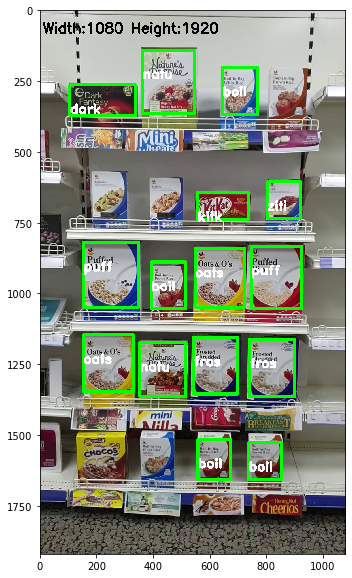

In [18]:
test_copy = test.copy ()

for coord in pro_cor_list :
    cv2.rectangle (
        test_copy, 
        tuple (coord [1:3]), 
        tuple (coord [3:]), 
        (0, 255, 0), 
        thickness=10
    )
    cv2.putText (
        test_copy, 
        coord [0] [:4], 
        (coord [1], coord [2]+100), 
        cv2.FONT_HERSHEY_DUPLEX, 
        1.5, 
        (255, 255, 255),
        5
    )
    
display_img (test_copy)

### Centre point to be used as nodes

In [19]:
template_centers_coord = list (map (
    lambda x: [x [0], int (np.mean (x [1::2])), int (np.mean (x [2::2]))],
    template_coordinates
))

In [20]:
test_centers_coord = list (map (
    lambda x: [x [0], int (np.mean (x [1::2])), int (np.mean (x [2::2]))],
    pro_cor_list
))

In [93]:
# Running Test Case
test_centers_coord_miss = list (map (
    lambda x: [x [0], int (np.mean (x [1::2])), int (np.mean (x [2::2]))],
    pro_cor_list_miss
))

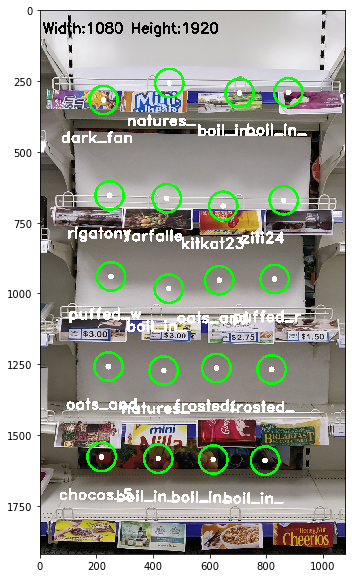

In [21]:
template_centers = template.copy ()
for coord in template_centers_coord:
    cv2.circle (template_centers, tuple (coord [1:]), 10, (255, 255, 255), -1)
    cv2.circle (template_centers, tuple (coord [1:]), 50, (0, 255, 0), 7)
    cv2.putText (
        template_centers, 
        coord [0] [:8], 
        (coord [1]-150, coord [2]+150), 
        cv2.FONT_HERSHEY_DUPLEX, 
        1.75, 
        (255, 255,255),
        5
    )
display_img (template_centers)

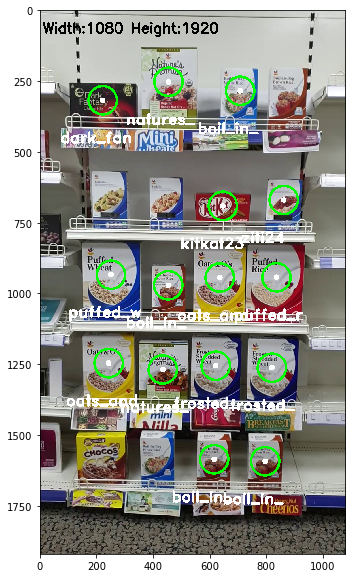

In [22]:
test_centers = test.copy ()
for coord in test_centers_coord:
    cv2.circle (test_centers, tuple (coord [1:]), 10, (255, 255, 255), -1)
    cv2.circle (test_centers, tuple (coord [1:]), 50, (0, 255, 0), 7)
    cv2.putText (
        test_centers, 
        coord [0] [:8], 
        (coord [1]-150, coord [2]+150), 
        cv2.FONT_HERSHEY_DUPLEX, 
        1.75, 
        (255, 255,255),
        5
    )
display_img (test_centers)

## Finding Reference points to identify rows in Test

In [23]:
reference_points = []
row = []
for coord in template_centers_coord:
    if coord[1] < 260:
        reference_points.append(coord)
        row.append(coord[0])

In [24]:
reference_points

[['dark_fantasy11', 224, 317],
 ['chocos_500g51', 217, 1577],
 ['puffed_wheat31', 250, 940],
 ['oats_and_os41', 241, 1258],
 ['rigatony21', 245, 654]]

In [25]:
remaining_points = [i for i in template_centers_coord if i not in reference_points]
remaining_points

[['natures_promise_raisin42', 436, 1272],
 ['boil_in_bag_white_rice52', 417, 1583],
 ['natures_promise_honey12', 456, 257],
 ['farfalle22', 447, 664],
 ['boil_in_bag_brown_rice32', 454, 983],
 ['frosted_shredded_wheat43', 622, 1263],
 ['oats_and_os33', 632, 953],
 ['kitkat23', 646, 691],
 ['boil_in_bag_brown_rice53', 611, 1586],
 ['boil_in_bag_white_rice13', 704, 292],
 ['frosted_shredded_wheat44', 817, 1268],
 ['puffed_rice34', 828, 949],
 ['boil_in_bag_brown_rice54', 794, 1590],
 ['ziti24', 860, 671],
 ['boil_in_bag_brown_rice14', 876, 290]]

## Creating Columns for LCS

In [26]:
def define_col(remaining_points,reference_points):
    col = [reference_points[a] for a in range(len(reference_points))]
    remaining_points1 = [i for i in remaining_points if i not in reference_points]
    while(len(remaining_points1)!=0):
        list2 = []
        for i in range(0,len(reference_points)):
            list1 = []
            for j in range(0,len(remaining_points1)):
                distance = distance_of_two_point(reference_points[i],remaining_points1[j])
                if(j==0):
                    list1.append(remaining_points1[j])
                    list1.append(distance)
                else:
                    if (distance < list1[1]):
                        list1 = []
                        list1.append(remaining_points1[j])
                        list1.append(distance)
            list2.append(list1[0])
        for k in range(0,len(reference_points)):
            col.append(list2[k])
        remaining_points1 = [i for i in remaining_points1 if i not in list2]
    col = [col[i * 5:(i + 1) * 5] for i in range((len(col) + 4) // 5 )]
    return col


## To define rows

In [27]:
def define_row(remaining_points1,reference_points):
    list2=[[],[],[],[],[]]
    list3=[[],[],[],[],[]]
    trasher = []
    for i in range(0,len(remaining_points1)):
        list1 = []
        for j in range(0,len(reference_points)):
            distance = distance_of_two_point(reference_points[j],remaining_points1[i])
            if(list1 == [] or list1[2]>=distance):
                list1 = [reference_points[j],remaining_points1[i],distance]
        if(reference_points[0] == list1[0]):
            trasher = [list1[1],distance]
            list2[0].append(trasher)
        elif(reference_points[1] == list1[0]):
            trasher = [list1[1],distance]
            list2[1].append(trasher)
        elif(reference_points[2] == list1[0]):
            trasher = [list1[1],distance]
            list2[2].append(trasher)
        elif(reference_points[3] == list1[0]):
            trasher = [list1[1],distance]
            list2[3].append(trasher)
        elif(reference_points[4] == list1[0]):
            trasher = [list1[1],distance]
            list2[4].append(trasher)
    for i in list2:
        i.sort(key = lambda x: x[1])
    
    for i,k in zip((list2),range(len(list3))):
        temp=[]
        for j in range(len(i)):
            temp.append(i[j][0][0])
        list3[k].append(temp)
    return list2,list3

In [28]:
row = define_row(template_centers_coord,reference_points)
row[0]

[[[['dark_fantasy11', 224, 317], 337.6536687198882],
  [['natures_promise_honey12', 456, 257], 449.5887009256349],
  [['boil_in_bag_white_rice13', 704, 292], 584.5724933658785],
  [['boil_in_bag_brown_rice14', 876, 290], 728.4620786286682]],
 [[['chocos_500g51', 217, 1577], 923.4246043938833],
  [['boil_in_bag_white_rice52', 417, 1583], 944.7883360838024],
  [['boil_in_bag_brown_rice53', 611, 1586], 1001.2891690216169],
  [['boil_in_bag_brown_rice54', 794, 1590], 1085.125338382622]],
 [[['puffed_wheat31', 250, 940], 286.04370295463593],
  [['boil_in_bag_brown_rice32', 454, 983], 389.7717280665698],
  [['oats_and_os33', 632, 953], 489.0500996830488],
  [['puffed_rice34', 828, 949], 653.3865624574781]],
 [[['oats_and_os41', 241, 1258], 604.0132448878915],
  [['natures_promise_raisin42', 436, 1272], 646.8423300928906],
  [['frosted_shredded_wheat43', 622, 1263], 716.2471640432512],
  [['frosted_shredded_wheat44', 817, 1268], 839.1543362218895]],
 [[['rigatony21', 245, 654], 0.0],
  [['far

In [29]:
row[1]

[[['dark_fantasy11',
   'natures_promise_honey12',
   'boil_in_bag_white_rice13',
   'boil_in_bag_brown_rice14']],
 [['chocos_500g51',
   'boil_in_bag_white_rice52',
   'boil_in_bag_brown_rice53',
   'boil_in_bag_brown_rice54']],
 [['puffed_wheat31',
   'boil_in_bag_brown_rice32',
   'oats_and_os33',
   'puffed_rice34']],
 [['oats_and_os41',
   'natures_promise_raisin42',
   'frosted_shredded_wheat43',
   'frosted_shredded_wheat44']],
 [['rigatony21', 'farfalle22', 'kitkat23', 'ziti24']]]

In [30]:
col =  define_col(remaining_points,reference_points)
col

[[['dark_fantasy11', 224, 317],
  ['chocos_500g51', 217, 1577],
  ['puffed_wheat31', 250, 940],
  ['oats_and_os41', 241, 1258],
  ['rigatony21', 245, 654]],
 [['natures_promise_honey12', 456, 257],
  ['boil_in_bag_white_rice52', 417, 1583],
  ['boil_in_bag_brown_rice32', 454, 983],
  ['natures_promise_raisin42', 436, 1272],
  ['farfalle22', 447, 664]],
 [['boil_in_bag_white_rice13', 704, 292],
  ['boil_in_bag_brown_rice53', 611, 1586],
  ['oats_and_os33', 632, 953],
  ['frosted_shredded_wheat43', 622, 1263],
  ['kitkat23', 646, 691]],
 [['boil_in_bag_brown_rice14', 876, 290],
  ['boil_in_bag_brown_rice54', 794, 1590],
  ['puffed_rice34', 828, 949],
  ['frosted_shredded_wheat44', 817, 1268],
  ['ziti24', 860, 671]]]

In [90]:
row_test = define_row(test_centers_coord,reference_points)

In [91]:
row_test[1]

[[['dark_fantasy11', 'natures_promise_honey12', 'boil_in_bag_white_rice13']],
 [['boil_in_bag_brown_rice53', 'boil_in_bag_brown_rice54']],
 [['puffed_wheat31',
   'boil_in_bag_brown_rice32',
   'oats_and_os33',
   'puffed_rice34']],
 [['oats_and_os41',
   'natures_promise_raisin42',
   'frosted_shredded_wheat43',
   'frosted_shredded_wheat44']],
 [['kitkat23', 'ziti24']]]

In [95]:
row_miss_check = define_row(test_centers_coord_miss,reference_points)
row_miss_check[1]

[[['dark_fantasy11', 'natures_promise_honey12', 'boil_in_bag_white_rice13']],
 [['boil_in_bag_brown_rice53', 'boil_in_bag_brown_rice54']],
 [[]],
 [['oats_and_os41',
   'natures_promise_raisin42',
   'frosted_shredded_wheat43',
   'frosted_shredded_wheat44']],
 [['kitkat23', 'ziti24']]]

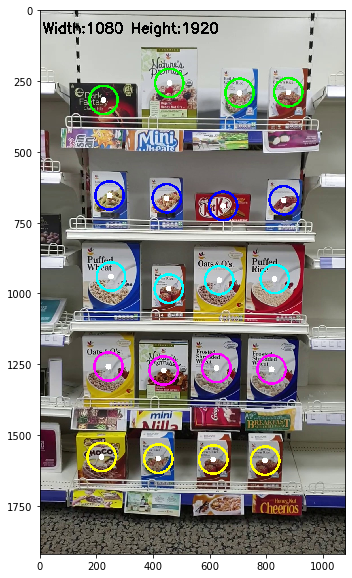

In [70]:
test_row_centers = test.copy ()
for coord in row[0][0]:
    cv2.circle (test_row_centers, tuple (coord [0][1:]), 10, (255, 255, 255), -1)
    cv2.circle (test_row_centers, tuple (coord [0][1:]), 50, (0, 255, 0), 7)

for coord in row[0][1]:
    cv2.circle (test_row_centers, tuple (coord [0][1:]), 10, (255, 255, 255), -1)
    cv2.circle (test_row_centers, tuple (coord [0][1:]), 50, (0, 255, 255), 7)

for coord in row[0][2]:
    cv2.circle (test_row_centers, tuple (coord [0][1:]), 10, (255, 255, 255), -1)
    cv2.circle (test_row_centers, tuple (coord [0][1:]), 50, (255, 255, 0), 7)

for coord in row[0][3]:
    cv2.circle (test_row_centers, tuple (coord [0][1:]), 10, (255, 255, 255), -1)
    cv2.circle (test_row_centers, tuple (coord [0][1:]), 50, (255, 0, 255), 7)

for coord in row[0][4]:
    cv2.circle (test_row_centers, tuple (coord [0][1:]), 10, (255, 255, 255), -1)
    cv2.circle (test_row_centers, tuple (coord [0][1:]), 50, (255, 0, 0), 7)
    
display_img (test_row_centers)

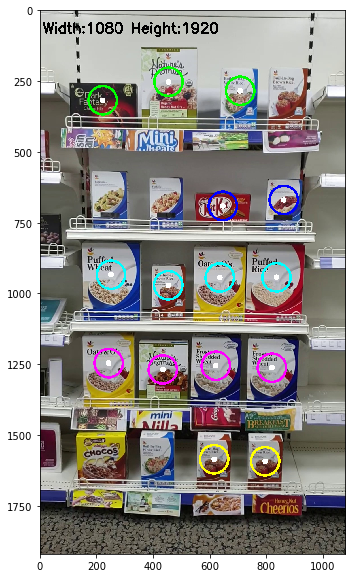

In [71]:
test_row_centers = test.copy ()

for coord in row_test[0][0]:
    cv2.circle (test_row_centers, tuple (coord [0][1:]), 10, (255, 255, 255), -1)
    cv2.circle (test_row_centers, tuple (coord [0][1:]), 50, (0, 255, 0), 7)

for coord in row_test[0][1]:
    cv2.circle (test_row_centers, tuple (coord [0][1:]), 10, (255, 255, 255), -1)
    cv2.circle (test_row_centers, tuple (coord [0][1:]), 50, (0, 255, 255), 7)

for coord in row_test[0][2]:
    cv2.circle (test_row_centers, tuple (coord [0][1:]), 10, (255, 255, 255), -1)
    cv2.circle (test_row_centers, tuple (coord [0][1:]), 50, (255, 255, 0), 7)

for coord in row_test[0][3]:
    cv2.circle (test_row_centers, tuple (coord [0][1:]), 10, (255, 255, 255), -1)
    cv2.circle (test_row_centers, tuple (coord [0][1:]), 50, (255, 0, 255), 7)

for coord in row_test[0][4]:
    cv2.circle (test_row_centers, tuple (coord [0][1:]), 10, (255, 255, 255), -1)
    cv2.circle (test_row_centers, tuple (coord [0][1:]), 50, (255, 0, 0), 7)
    
display_img (test_row_centers)


## LCS code

In [35]:
def lcs(X , Y): 
    # find the length of the strings 
    m = len(X) 
    n = len(Y)
    flag = 0
    # To check for extra products
    if (m>4 or n>4):
        flag = 1
  
    # declaring the array for storing the dp values 
    L = [[None]*(n+1) for i in range(m+1)] 
  
    """Following steps build L[m+1][n+1] in bottom up fashion 
    Note: L[i][j] contains length of LCS of X[0..i-1] 
    and Y[0..j-1]"""
    for i in range(m+1): 
        for j in range(n+1): 
            if i == 0 or j == 0 : 
                L[i][j] = 0
            elif X[i-1] == Y[j-1]: 
                L[i][j] = L[i-1][j-1]+1
            else: 
                L[i][j] = max(L[i-1][j] , L[i][j-1]) 
  
    # L[m][n] contains the length of LCS of X[0..n-1] & Y[0..m-1] 
    return L[m][n],flag

In [98]:
def result1(row,row_test):
    scores1 = []
    for i in range(len(row[1])):
        scores = []
        print(row_test[1][i][0])
        if(row_test[1][i][0] != []):
            score = lcs(row[1][i][0],row_test[1][i][0])[0]
            flag = lcs(row[1][i][0],row_test[1][i][0])[1]
            rem = 4-score
            if(rem != 0 and flag == 0):
                scores = str(score) + 'P '+str(rem) + 'A'
            elif(flag == 1):
                scores = 'Extra item present'
            else:
                scores = str(score) + 'P ' + 'All'
        else:
            scores = 'Row is empty'
        scores1.append(scores)
    return scores1

In [99]:
result = result1(row,row_test)
result

['dark_fantasy11', 'natures_promise_honey12', 'boil_in_bag_white_rice13']
['boil_in_bag_brown_rice53', 'boil_in_bag_brown_rice54']
['puffed_wheat31', 'boil_in_bag_brown_rice32', 'oats_and_os33', 'puffed_rice34']
['oats_and_os41', 'natures_promise_raisin42', 'frosted_shredded_wheat43', 'frosted_shredded_wheat44']
['kitkat23', 'ziti24']


['3P 1A', '2P 2A', '4P All', '4P All', '2P 2A']

In [100]:
result_miss = result1(row,row_miss_check)
result_miss

['dark_fantasy11', 'natures_promise_honey12', 'boil_in_bag_white_rice13']
['boil_in_bag_brown_rice53', 'boil_in_bag_brown_rice54']
[]
['oats_and_os41', 'natures_promise_raisin42', 'frosted_shredded_wheat43', 'frosted_shredded_wheat44']
['kitkat23', 'ziti24']


['3P 1A', '2P 2A', 'Row is empty', '4P All', '2P 2A']

### Function to display row

In [ ]:
def row_show(row_test,test_row_centers,result):
    img2 = np.zeros((1920,800,3),np.uint8)
    for coord in row_test[0][0]:
        cv2.circle (test_row_centers, tuple (coord [0][1:]), 10, (255, 255, 255), -1)
        cv2.circle (test_row_centers, tuple (coord [0][1:]), 50, (0, 255, 0), 7)

    for coord in row_test[0][1]:
        cv2.circle (test_row_centers, tuple (coord [0][1:]), 10, (255, 255, 255), -1)
        cv2.circle (test_row_centers, tuple (coord [0][1:]), 50, (0, 255, 255), 7)

    for coord in row_test[0][2]:
        cv2.circle (test_row_centers, tuple (coord [0][1:]), 10, (255, 255, 255), -1)
        cv2.circle (test_row_centers, tuple (coord [0][1:]), 50, (255, 255, 0), 7)

    for coord in row_test[0][3]:
        cv2.circle (test_row_centers, tuple (coord [0][1:]), 10, (255, 255, 255), -1)
        cv2.circle (test_row_centers, tuple (coord [0][1:]), 50, (255, 0, 255), 7)

    for coord in row_test[0][4]:
        cv2.circle (test_row_centers, tuple (coord [0][1:]), 10, (255, 255, 255), -1)
        cv2.circle (test_row_centers, tuple (coord [0][1:]), 50, (255, 0, 0), 7)

    viz = np.concatenate((test_row_centers, img2), axis=1)
    for i in range(1,len(result)+1):
        k = i*320
        if(result[i-1]=='Row is empty'):
            cv2.putText(viz,result[i-1],(1140,k),cv2.FONT_HERSHEY_DUPLEX,2,(255, 255, 255),4)
        else:
            cv2.putText(viz,result[i-1]+'-> Row'+str(i),(1140,k),cv2.FONT_HERSHEY_DUPLEX,2,(255, 255, 255),4)

    display_img(viz)

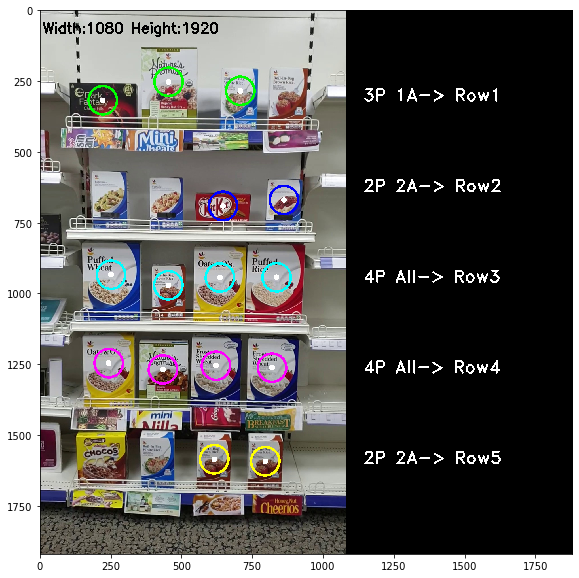

In [109]:
test_row_centers = test.copy ()
row_show(row_test,test_row_centers,result)

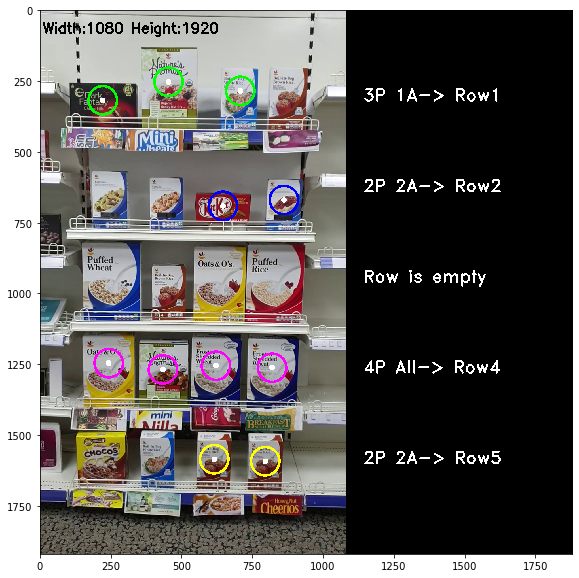

In [110]:
# Row missing Test Case
test_row_centers = test.copy ()
row_show(row_miss_check,test_row_centers,result_miss)

# Template Graph

In [ ]:
# Store the vertices in a dictionary
# Sample - 
# { V1: [(V2, E12), (V3, E13)...], V2: [(V1, E12), (V3, E23)..], ... }

template_graph = {}

for i, coordinates in enumerate (template_coordinates):
    # Min distances
    min_right = min_left = min_top = min_bottom = min_right_bottom=min_left_bottom = min_right_top=min_top_left= None
    left_node = right_node = top_node = bottom_node = bottom_right_node= bottom_left_node=top_right_node=top_left_node= None
    
    # Check its neighbors (8 directions)
    for neighbor in template_coordinates [:i] + template_coordinates [i+1:]:
        # Find the closet neighbor
        
        #print (neighbor, coordinates)
        if (coordinates [1] < neighbor [1]) and (coordinates [4] > neighbor [2])and abs(coordinates[1]-neighbor[1])>50: # Right
            # Take the distance from the center of the right edge of the currrent box
            # to the center of the left edge of the neighbor
            # dist = neighbor [1] - coordinates [1]
            dist = np.sqrt (
                (coordinates [3]-neighbor [1])**2 + (coordinates [2]-neighbor [2])**2
            )
            
            if min_right == None or dist < min_right :
                if dist<250:
                    min_right = dist
                    right_node = neighbor [0]
                
        if (coordinates [4] < neighbor [2]) and (neighbor [1] < coordinates [3]): # Bottom
            #dist = neighbor [2] - coordinates [4]
            dist = np.sqrt (
                (coordinates [1]-neighbor [1])**2 + (coordinates [4]-neighbor [2])**2
            )
            
            if min_bottom == None or dist < min_bottom:
                min_bottom = dist
                bottom_node = neighbor [0]
                
        if (coordinates [1] > neighbor [3]) and (coordinates [4] > neighbor [2]): # Left
            dist = np.sqrt (
                (coordinates [1]-neighbor [3])**2 + (coordinates [2]-neighbor [2])**2
            )
            
            if min_left == None or dist < min_left:
                min_left = dist
                left_node = neighbor [0]
                
                
        if (coordinates [2] > neighbor [4]) and (neighbor [1] < coordinates [3]): # Top
            #dist = neighbor [2] - coordinates [4]
            dist = np.sqrt (
                (coordinates [1]-neighbor [1])**2 + (coordinates [2]-neighbor [4])**2
            )
            
            if min_top == None or dist < min_top:
                min_top = dist
                top_node = neighbor [0]
            
         
        
        if (coordinates [4] < neighbor [2]) and (abs(coordinates [3] - neighbor [1])<50 or coordinates [3] < neighbor [1]): # Bottom-right
            dist = np.sqrt (
                (coordinates [3]-neighbor [1])**2 + (coordinates [4]-neighbor [2])**2
            )
            
            if min_right_bottom == None or dist < min_right_bottom:
                min_right_bottom = dist
                bottom_right_node = neighbor [0]
        
        
        if (coordinates [4] < neighbor [2]) and (coordinates [1] > neighbor [3]): # Bottom-left
            dist = np.sqrt (
                (coordinates [1]-neighbor [3])**2 + (coordinates [4]-neighbor [2])**2
            )
            
            if min_left_bottom == None or dist < min_left_bottom:
                min_left_bottom = dist
                bottom_left_node = neighbor [0]
        
            
            
    # Create a vertex
    template_graph [coordinates [0]] = [
        [right_node, 'right',min_right], 
        [bottom_node, 'bottom',min_bottom],
        [left_node, 'left',min_left],
        [top_node, 'top',min_top],
        [bottom_right_node,"bottom_right",min_right_bottom],
        [bottom_left_node,"bottom_left",min_left_bottom]
    ]
    
pprint.pprint (template_graph)

# Wasteful functions

In [ ]:
# col_test = [reference_points[a] for a in range(len(reference_points))]
col_test=[]
remaining_points1 = [i for i in test_centers_coord if i not in reference_points]
while(len(remaining_points1)!=0):
    list2 = []
    for i in range(0,len(reference_points)):
        list1 = []
        for j in range(0,len(remaining_points1)):
            distance = distance_of_two_point(reference_points[i],remaining_points1[j])
            if(j==0):
                list1.append(remaining_points1[j])
                list1.append(distance)
            else:
                if (distance < list1[1]):
                    list1 = []
                    list1.append(remaining_points1[j])
                    list1.append(distance)
        list2.append(list1[0])
    res = [] 
    [res.append(x) for x in list2 if x not in res]
    for i in range(5):
        if(len(res)!=5):
            res.append(0)
    col_test.append(res)
    
    
    remaining_points1 = [i for i in remaining_points1 if i not in list2]


In [ ]:
col_test